![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
my_folder = "/content/drive/MyDrive/Concentracion_SAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Concentracion_SAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [2]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [3]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [4]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [5]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [6]:
#%%writefile .authinfo
#oda user A01197595@tec.mx password pwd

Copy this file to home

In [7]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [8]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/Concentracion_SAS/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 1414



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/Concentracion_SAS/sascfg_personal.py
WORK Path             = /saswork/SAS_workC0A90001E144_odaws02-usw2-2.oda.sas.com/SAS_work228A0001E144_odaws02-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 123204


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [9]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 03:24:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 03:24:00 PM

33         


For local Jupyter

In [10]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [11]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

## Merge the Data

In [12]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)

#data_merge.head()


,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
652773,2652774.0,TRENT,ANTHONY,0.0,74.0,64000.0,High School,Downtown,7.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,30.0
117649,2117650.0,CAMPE,DONALD,0.0,41.0,59300.0,University / College,Rural,5.0,2.0,...,2.0,1.0,2.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0
217662,2217663.0,HOCKING,AURELIA,1.0,19.0,2700.0,University / College,Suburban,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
780997,2780998.0,TURNER,LEONEL,0.0,54.0,1700.0,University / College,City,7.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
66839,2066840.0,SOLADA,TOSHIA,1.0,55.0,47800.0,High School,City,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [13]:
data_merge.shape

(1000000, 21)

In [14]:
data_merge.isna().sum()

ID                   0
LastName            23
FirstName            4
Woman                0
Age                  0
Salary               0
Education            0
City                 0
SeniorList           0
NbActivities         0
Referrals            0
Recency         663666
Frequency       663666
Seniority       663666
TotalGift       663666
MinGift         663666
MaxGift         663666
GaveLastYear         0
AmtLastYear          0
GaveThisYear         0
AmtThisYear          0
dtype: int64

## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


In [15]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  

data_merge.isna().sum()

ID                   0
LastName            23
FirstName            4
Woman                0
Age                  0
Salary               0
Education            0
City                 0
SeniorList           0
NbActivities         0
Referrals            0
Recency         663666
Frequency       663666
Seniority       663666
TotalGift       663666
MinGift              0
MaxGift         663666
GaveLastYear         0
AmtLastYear          0
GaveThisYear         0
AmtThisYear          0
dtype: int64

In [16]:
data_merge.sample(15)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
707382,2707383.0,DANIELS,JAMES,0.0,59.0,107600.0,University / College,City,6.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
11149,2011150.0,JACKSON,STEWART,0.0,65.0,20400.0,High School,Downtown,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
940837,2940838.0,FULTON,SHERYL,1.0,35.0,66000.0,University / College,City,10.0,3.0,...,2.0,3.0,10.0,620.0,10.0,600.0,1.0,300.0,0.0,0.0
500265,2500266.0,ARY,NORMA,1.0,38.0,74500.0,University / College,Downtown,5.0,0.0,...,4.0,1.0,4.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0
161392,2161393.0,COUTURE,KIMBERLY,1.0,25.0,7000.0,High School,Rural,3.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
82097,2082098.0,ROWE,CHARLES,0.0,54.0,66600.0,High School,Suburban,1.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
333470,2333471.0,COFFEY,DELBERT,0.0,62.0,2700.0,High School,Rural,9.0,0.0,...,9.0,1.0,9.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0
540759,2540760.0,JOHNSON,PHIL,0.0,85.0,53800.0,High School,Rural,5.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,1.0,40.0,0.0,0.0
135294,2135295.0,MAGNUSSON,BENJAMIN,0.0,89.0,66300.0,University / College,City,4.0,1.0,...,2.0,1.0,2.0,20.0,20.0,20.0,1.0,10.0,0.0,0.0
441489,2441490.0,LIEN,GEOFFREY,0.0,47.0,121700.0,University / College,Downtown,6.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0


In [17]:
data_merge[['Recency', 'Frequency', 'Seniority', 'TotalGift', 'MinGift','MaxGift', 'GaveLastYear']].describe()

,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear
count,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,336334.000000,1000000.000000
mean,3.039636,1.666882,4.474148,104.454055,14.506170,85.897932,0.122101
std,2.120722,1.052090,2.588119,303.760477,89.486978,283.581066,0.327403
min,1.000000,1.000000,1.000000,10.000000,0.000000,10.000000,0.000000
25%,1.000000,1.000000,2.000000,20.000000,0.000000,20.000000,0.000000
50%,2.000000,1.000000,4.000000,40.000000,0.000000,30.000000,0.000000
75%,4.000000,2.000000,6.000000,90.000000,15.000000,75.000000,0.000000
max,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000


In [18]:
data_merge[data_merge.isna().any(axis=1)][['Recency', 'Frequency', 'Seniority', 'TotalGift', 'MinGift','MaxGift', 'GaveLastYear']]

,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear
1,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2,NaN,NaN,NaN,NaN,0.0,NaN,0.0
3,NaN,NaN,NaN,NaN,0.0,NaN,0.0
4,NaN,NaN,NaN,NaN,0.0,NaN,0.0
5,NaN,NaN,NaN,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...
999993,NaN,NaN,NaN,NaN,0.0,NaN,0.0
999994,NaN,NaN,NaN,NaN,0.0,NaN,0.0
999996,NaN,NaN,NaN,NaN,0.0,NaN,0.0
999998,NaN,NaN,NaN,NaN,0.0,NaN,0.0


### Instead of not using the rows with NA, we decide to replace the missing values with their minimum registries in the data. We wont replace LastName or FirstName

In [19]:
data_merge['Recency'].min()

1.0

In [20]:
data_merge[['Recency']] = data_merge[['Recency']].fillna(value=0) 
data_merge[['Frequency']] = data_merge[['Frequency']].fillna(value=0)  
data_merge[['Seniority']] = data_merge[['Seniority']].fillna(value=0)  
data_merge[['TotalGift']] = data_merge[['TotalGift']].fillna(value=0)  
data_merge[['MaxGift']] = data_merge[['MaxGift']].fillna(value=0)  

data_merge[['Recency', 'Frequency', 'Seniority', 'TotalGift', 'MinGift','MaxGift', 'GaveLastYear']].isna().sum()

Recency         0
Frequency       0
Seniority       0
TotalGift       0
MinGift         0
MaxGift         0
GaveLastYear    0
dtype: int64

# Using Dummy Variables
We use dummy variables to solve the problem of categorical data

In [21]:
data_merge['Education'].unique()

array(['University / College', 'High School', 'Elementary'], dtype=object)

In [22]:
data_merge['City'].unique()

array(['City', 'Rural', 'Suburban', 'Downtown'], dtype=object)

In [23]:
data_merge = pd.get_dummies(data_merge, columns = ['Education', 'City'])
data_merge.head()

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,AmtLastYear,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0,0,1,1,0,0,0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,1,0


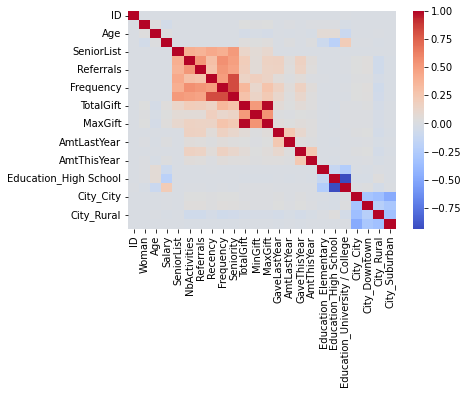

In [24]:
import seaborn as sns
sns.heatmap(data_merge.corr(), cmap ='coolwarm')

In [25]:
data_merge.columns

Index(['ID', 'LastName', 'FirstName', 'Woman', 'Age', 'Salary', 'SeniorList',
       'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear',
       'GaveThisYear', 'AmtThisYear', 'Education_Elementary',
       'Education_High School', 'Education_University / College', 'City_City',
       'City_Downtown', 'City_Rural', 'City_Suburban'],
      dtype='object')

### We scale some of the columns using a MinMax Scaler

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_merge[['Salary', 'TotalGift','MinGift','MaxGift']] = scaler.fit_transform(data_merge[['Salary', 'TotalGift','MinGift','MaxGift']])

## Data Partition

In [28]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.4, random_state=12345) 

#train.head()
train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,AmtLastYear,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
492002,2492003.0,YATES,JENNIE,1.0,21.0,0.0176,5.0,4.0,0.0,2.0,...,0.0,0.0,0.0,0,0,1,1,0,0,0
596236,2596237.0,VAZQUEZ,EVELYN,1.0,36.0,0.0932,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,1,0


## Prebuilt Models
***

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.


In [29]:
from sklearn import linear_model

#comment: it's numpy array
X_train = train[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'GaveLastYear','Education_Elementary', 'Education_High School',
       'Education_University / College', 'City_City', 'City_Downtown',
       'City_Rural', 'City_Suburban']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'GaveLastYear', 'Education_Elementary', 'Education_High School',
       'Education_University / College', 'City_City', 'City_Downtown',
       'City_Rural', 'City_Suburban']] 
Y_valid = validation['AmtThisYear']

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [30]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

13.188955176454224
7593.182466834768
87.13886886364068


## **Regression Tree Model**

In [31]:
from sklearn.tree import DecisionTreeRegressor

X_train = train[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'GaveLastYear', 'Education_Elementary', 'Education_High School',
       'Education_University / College', 'City_City', 'City_Downtown',
       'City_Rural', 'City_Suburban']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'GaveLastYear', 'Education_Elementary', 'Education_High School',
       'Education_University / College', 'City_City', 'City_Downtown',
       'City_Rural', 'City_Suburban']] 
Y_valid = validation['AmtThisYear']

DT_model = DecisionTreeRegressor(max_depth=6).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [32]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

13.17458437697422
7618.772243552968
87.28557866883261


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


In [33]:
sample = train.sample(int(train.shape[0]*0.15)) 
x_sample = sample[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'GaveLastYear', 'Education_Elementary', 'Education_High School',
       'Education_University / College', 'City_City', 'City_Downtown',
       'City_Rural', 'City_Suburban']]
y_sample = sample['AmtThisYear']

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
depth = list()
mae = list()
mse = list()
rmse = list()
for i in range(1,7):
  model = DecisionTreeRegressor(max_depth = i)
  model.fit(x_sample,y_sample)
  model_preds = model.predict(X_valid)
  depth.append(i)
  mae.append(metrics.mean_absolute_error(Y_valid,model_preds))
  mse.append(metrics.mean_squared_error(Y_valid,model_preds))
  rmse.append(np.sqrt(metrics.mean_squared_error(Y_valid,model_preds)))



In [67]:
results = pd.DataFrame(list(zip(depth,mae,mse,rmse)), columns = ['Depth', 'MAE','MSE','RMSE'])
results.set_index('Depth', inplace = True)
results

,MAE,MSE,RMSE
Depth,,,
1,13.439980,7625.826928,87.325981
2,13.350354,7620.955413,87.298084
3,13.357674,7619.215398,87.288117
4,13.346391,7633.316478,87.368853
5,13.357149,7894.080095,88.848636
6,13.367758,8026.287554,89.589550


In [145]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters={"splitter":["best","random"],
            "max_depth" : [2,3,4],
           "min_samples_leaf":[2,3,4],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40] }

clf = RandomizedSearchCV(estimator=DecisionTreeRegressor(), param_distributions = parameters,
                               cv = 2, n_iter = 400, n_jobs=-1)
clf.fit(X_train, Y_train)


RandomizedSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_iter=400,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30,
                                                           40],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4],
                                        'splitter': ['best', 'random']})

In [147]:
print('Los mejores parametros son: ', clf.best_params_)

Los mejores parametros son:  {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 4, 'max_leaf_nodes': 40, 'max_features': None, 'max_depth': 4}


In [152]:
model= DecisionTreeRegressor(splitter = 'best', min_weight_fraction_leaf= 0.1, min_samples_leaf= 4, max_leaf_nodes= 40, max_features= 10, max_depth= 4)
model.fit(X_train,Y_train)
y_preds = model.predict(X_valid)

In [153]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,y_preds))
#MSE
print(metrics.mean_squared_error(Y_valid,y_preds))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,y_preds)))

13.259764649234585
7618.341911913292
87.28311355533378


In [154]:
import matplotlib.pyplot as plt

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

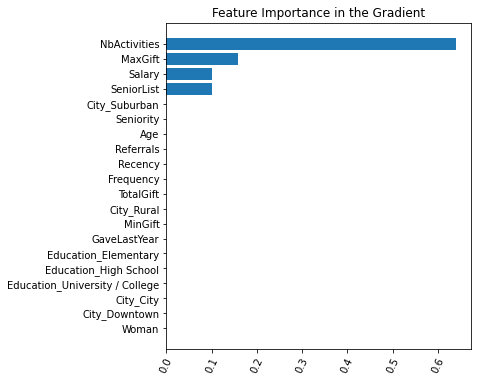

In [155]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance in the Gradient")
plt.xticks(rotation=65)


## Scoring New Data

### Prepare data for scoring

In [109]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [110]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.
scoring_data.columns

Index(['ID', 'GaveLastYear', 'AmtLastYear', 'LastName', 'FirstName', 'Woman',
       'Age', 'Salary', 'Education', 'City', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift'],
      dtype='object')

In [111]:
scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0)
scoring_data[['Recency']] = scoring_data[['Recency']].fillna(value=0) 
scoring_data[['Frequency']] = scoring_data[['Frequency']].fillna(value=0)  
scoring_data[['Seniority']] = scoring_data[['Seniority']].fillna(value=0)  
scoring_data[['TotalGift']] = scoring_data[['TotalGift']].fillna(value=0)  
scoring_data[['MaxGift']] = scoring_data[['MaxGift']].fillna(value=0) 
scoring_data = pd.get_dummies(scoring_data, columns = ['Education', 'City']) 
scoring_data[['Salary', 'TotalGift','MinGift','MaxGift']] = scaler.transform(scoring_data[['Salary', 'TotalGift','MinGift','MaxGift']])

In [112]:
scoring_data.columns

Index(['ID', 'GaveLastYear', 'AmtLastYear', 'LastName', 'FirstName', 'Woman',
       'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals', 'Recency',
       'Frequency', 'Seniority', 'TotalGift', 'MinGift', 'MaxGift',
       'Education_Elementary', 'Education_High School',
       'Education_University / College', 'City_City', 'City_Downtown',
       'City_Rural', 'City_Suburban'],
      dtype='object')

In [113]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = scoring_data[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'GaveLastYear','Education_Elementary', 'Education_High School',
       'Education_University / College', 'City_City', 'City_Downtown',
       'City_Rural', 'City_Suburban']] 
predict_end=DT_model.predict(X)

scoring_data['Prediction'] = predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)
scoring_data.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,...,MinGift,MaxGift,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban,Prediction
478470,2478471.0,1.0,4000.0,WEBB,PHYLLIS,1.0,60.0,0.8064,10.0,1.0,...,0.0010,0.030,0,0,1,1,0,0,0,4000.000000
581495,2581496.0,0.0,0.0,SANDS,DANIEL,0.0,30.0,0.3264,1.0,0.0,...,0.0030,0.040,0,0,1,1,0,0,0,345.714286
360297,2360298.0,0.0,0.0,JONES,SHARON,1.0,51.0,0.2012,2.0,0.0,...,0.0030,0.040,0,0,1,0,1,0,0,345.714286
436501,2436502.0,0.0,0.0,HUTTO,MARY,1.0,71.0,0.3592,2.0,1.0,...,0.0010,0.040,0,0,1,1,0,0,0,345.714286
542724,2542725.0,0.0,0.0,SANDERS,MARISSA,1.0,87.0,0.1192,3.0,0.0,...,0.0175,0.025,0,1,0,0,0,0,1,345.714286


## Exporting Results to a CSV File

In [118]:
Result= scoring_data['ID'].astype(int)
#Result.to_csv('Round1_Output.csv', index=False)

In [119]:
# Define your cutoff and choose a number of rows to submit to the leaderboard

NB = 160000
submission = Result.head(NB)
submission.to_csv('Round1 Output.csv', index=False)

In [120]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.


In [121]:
!head Round1\ Output.csv

ID
2478471
2581496
2360298
2436502
2542725
2459046
2780052
2128775
2895346
